<h3>Checkpoint Objective</h3>
In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

<h5>Columns explanation : </h5>
<ul><li>CUST_ID: Identification of Credit Card holder (Categorical)</li>
<li>BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)</li>
<li>PURCHASES: Amount of purchases made from account </li>
<li>CASH_ADVANCE: Cash in advance given by the user</li>
<li>CREDIT_LIMIT: Limit of Credit Card for user</li>
<li>PAYMENTS: Amount of Payment done by user</li><ul>

<h4>Instructions</h4>
<ol><li>Import you data and perform basic data exploration phase</li>
<li>Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )</li>
<li>Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')</li>
<li>Perform partitional clustering using the K-means algorithm. Then, plot the clusters</li>
<li>Find the best k value and plot the clusters again.</li>
<li>Interpret the results</li>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('dataset\Credit_card_dataset.csv')
data

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [3]:
CC = data.copy()
CC.head(3)

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000


In [4]:
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [5]:
CC.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [6]:
dp = pd.DataFrame(CC)
duplicates = dp[dp.duplicated()]
print ('Duplicate rows:')
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [CUST_ID, BALANCE_FREQUENCY, PURCHASES, PAYMENTS, CREDIT_LIMIT, CASH_ADVANCE]
Index: []


In [7]:
CC.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [8]:
CC.dropna(inplace = True)

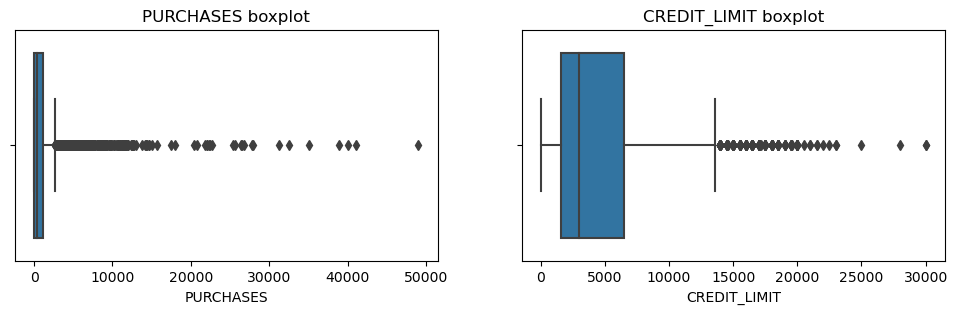

In [9]:
# Data Preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
def outlier(dataframe, a,b):
    plt.figure(figsize = (12, 3))
    plt.subplot(1,2,1)
    sns.boxplot(x = dataframe[a])
    plt.title(f"{a} boxplot")

    plt.subplot(1,2,2)
    sns.boxplot(x = dataframe[b])
    plt.title(f"{b} boxplot")

outlier(CC, 'PURCHASES', 'CREDIT_LIMIT')

In [10]:
def outlierRemoval(dataframe):
    for i in dataframe.columns:
        lowerQuartile = dataframe[i].describe()[4]
        upperQuartile = dataframe[i].describe()[6]
        IQR = upperQuartile - lowerQuartile
        lowerIQR = lowerQuartile- 1.5 * IQR
        upperIQR = upperQuartile + 1.5 * IQR
        dataframe = dataframe.loc[(dataframe[i] >= lowerIQR) & (dataframe[i] <= upperIQR)]
    return dataframe

CC['PURCHASES'] = outlierRemoval(CC[['PURCHASES']])
CC['CREDIT_LIMIT'] = outlierRemoval(CC[['CREDIT_LIMIT']])
CC.dropna(inplace = True)
d = CC[['PURCHASES', 'CREDIT_LIMIT']]
d.head()

,PURCHASES,CREDIT_LIMIT
0,95.40,1000.0
1,0.00,7000.0
2,773.17,7500.0
3,1499.00,7500.0
4,16.00,1200.0


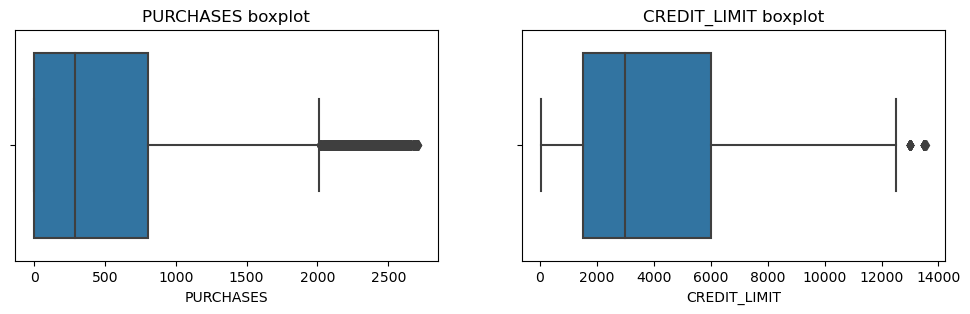

In [11]:
# Check if the outlier has been removed
def outlier(dataframe, a, b):
    plt.figure(figsize = (12, 3))
    plt.subplot(1,2,1)
    sns.boxplot(x = dataframe[a])
    plt.title(f"{a} boxplot")

    plt.subplot(1,2,2)
    sns.boxplot(x = dataframe[b])
    plt.title(f"{b} boxplot")

outlier(CC, 'PURCHASES', 'CREDIT_LIMIT')

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dd = d.copy()
for i in d:
    dd[[i]] = scaler.fit_transform(dd[[i]])

In [13]:
dd.head(5)

,PURCHASES,CREDIT_LIMIT
0,0.035178,0.070370
1,0.000000,0.514815
2,0.285103,0.551852
3,0.552749,0.551852
4,0.005900,0.085185


K-Means Clustering

Note: you may need to restart the kernel to use updated packages.


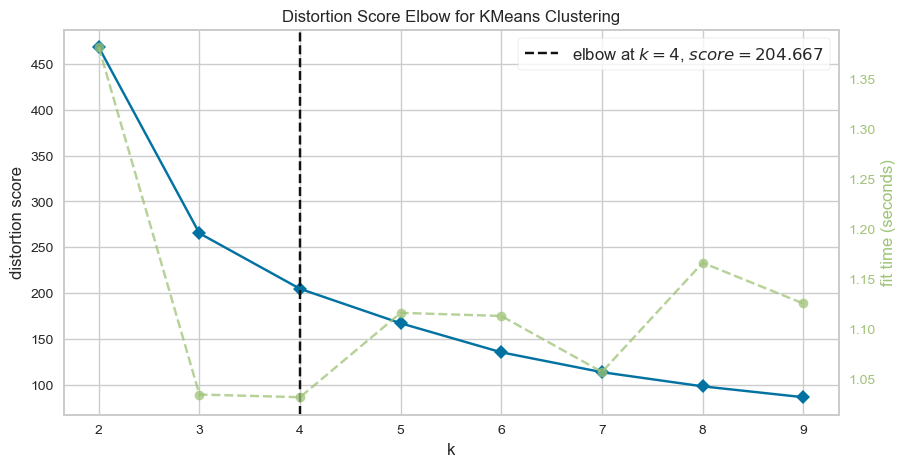

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
#install yellowbrick to vizualize the Elbow curve
%pip install yellowbrick  --q

from sklearn.cluster import KMeans # ------------------------------------------- Instantiate the KMeans algorithm
from yellowbrick.cluster import KElbowVisualizer # ----------------------------- Instantiate the plotting library

x = dd[['PURCHASES', 'CREDIT_LIMIT']]

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

plt.figure(figsize = (10, 5))
visualizer.fit(x) #............................................................. Fit the data to the visualizer
visualizer.show() #............................................................. Finalize and render the figure

In [15]:
kmeans_5 = KMeans(n_clusters = 5).fit(x) # ..................................... Fit Kmeans Algorthm on the Data Subset
X = x.values
kmeans_5_label = kmeans_5.labels_
print(f"KMeans algortihm labels: {kmeans_5.labels_}\n\n") # ............................................. Instantiate the labels of the model
print(f"cluster centers: {kmeans_5.cluster_centers_}")

KMeans algortihm labels: [0 2 3 ... 0 0 4]


cluster centers: [[0.06687279 0.13360345]
 [0.75838701 0.43779507]
 [0.06912829 0.40754108]
 [0.1769159  0.7158011 ]
 [0.40406799 0.21451847]]


Hierarchical Clustering

In [16]:
# hierarchical clustering using AgglomerativeClustering
# Train the Hierarchichal clustering on our dataset, having gotten the number of clusters

from sklearn.cluster import AgglomerativeClustering
h_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
pred = h_cluster.fit_predict(x)

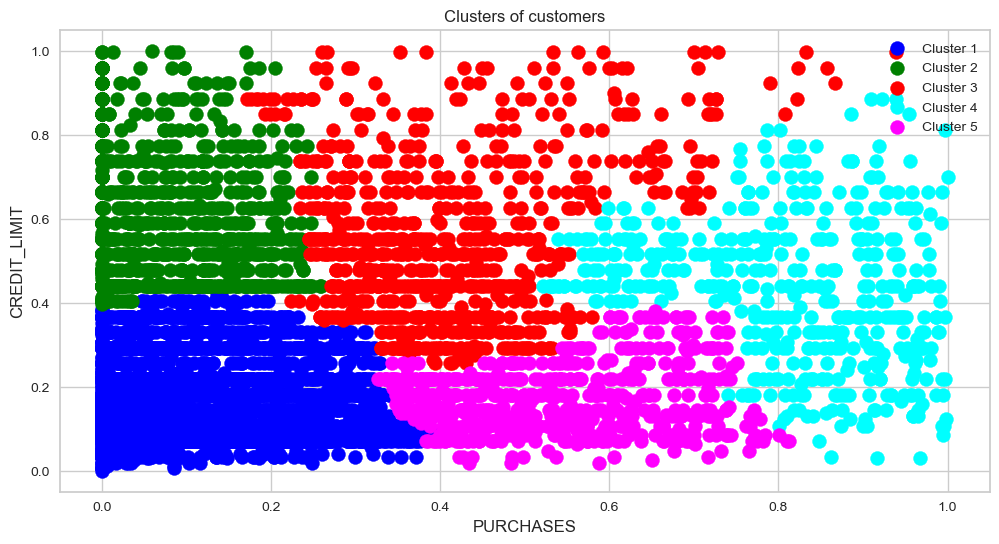

In [17]:
#visulaizing the clusters
plt.figure(figsize = (12, 6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[pred== 2, 0], X[pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()

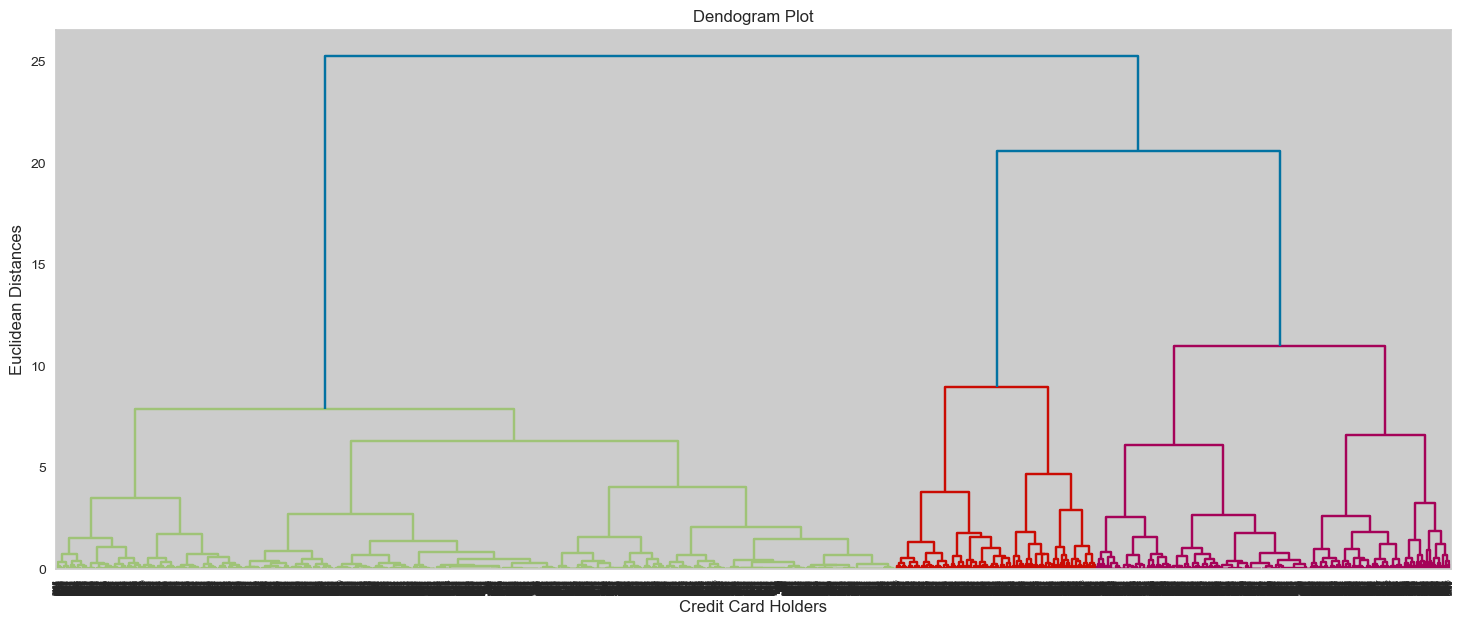

In [19]:
# We endeavour to identify the numbers of Hierarchy needed for the clustering

import scipy.cluster.hierarchy as shc
plt.figure(figsize = (18, 7))

dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.title("Dendogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Credit Card Holders")                     
plt.show()

Best K Value

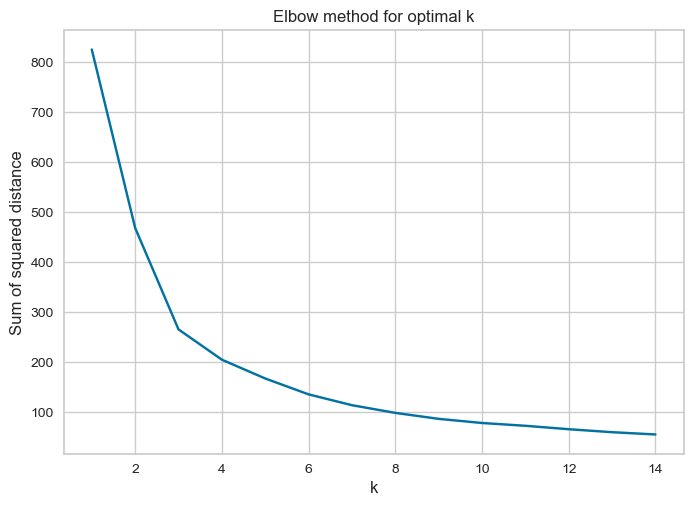

In [22]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

sum_of_sqaured_distance = []
k = range(1, 15)
for i in k:
  km = KMeans(n_clusters = i)
  km = km.fit(dd)
  sum_of_sqaured_distance.append(km.inertia_)


plt.plot(k, sum_of_sqaured_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.title("Elbow method for optimal k")
plt.show()

<b><u>Interpretation</b></u>:
<ul>
<li>Class Blue: Very low credit limit and very low purchases</li>
<li>Class Green: High credit limit and very Low Purchases</li>
<li>Class Pink: Very low credit limit and Average Purchasers</li>
<li>Class Red: Very high credit limit and Average Purchasers</li>
<li>Class Blue: High credit limit and Very high Purchasers</li>

</ul>